# D3 Visualização de Dados

Aluno: Antônio Luís Sombra de Medeiros

Trabalho final da disciplina de Visualização de Dados - Dez/2017

## Dados

Abaixo segue um resumo dos detalhes da estrutura dos dados.

|*Column*|*Type*|*Description*
|---|---|---
|*PassengerID*|*Integer*|*Numerical identifier for each passenger*
|*Survived*|*Binary (Integer)*|*Whether the passenger survived (0 = No; 1 = Yes)*
|*Pclass*|*Categorical (Integer)*|*Passenger Class<br>(1 = 1st; 2 = 2nd; 3 = 3rd);<br>Pclass is a proxy for socio-economic status<br>(1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower)*
|*Name*|*String*|*Passenger name*
|*Sex*|*Binary (String)*|*Sex (male; female)*
|*Age*|*Float*|*Passenger age in years<br>Fractional if age less than one, xx.5 if estimated*
|*SibSp*|*Integer*|*Number of siblings/ spouses aboard<br>(Brother, sister, stepbrother, or stepsister; husband or wife)*
|*Parch*|*Integer*|*Number of parents/ children aboard<br>(Mother or father, son, daughter, stepson or stepdaughter)*
|*Ticket*|*String*|*Ticket Number*
|*Fare*|*Float*|*Amount paid for ticket*
|*Cabin*|*String*|*Cabin number*
|*Embarked*|*Categorical (String)*|*Port of embarkation<br>(C = Cherbourg; Q = Queenstown; S = Southampton)*



### Quais os riscos e suposições de nossos dados:

Suposições:
    
    -- Dados corretamente capturados
    
Riscos:
    - Dados não cobrirem todos os passageiros do Titanic
    - Número aproximado de passageiros a bordo :~1,317 (fonte: www.titanicfacts.net/titanic-passengers.html)
    - Dados podem não ser representativos para os passageiros a bordo
        - Em relação à proporção de gender, age, and class 
    - Missing data
    - SibSp e Parch mostram se o passageiros está viajando em grupo ou sozinho, mas nem todas as relações são capturadas (source: https://www.kaggle.com/c/titanic/data)


## Objetivo


Após ter uma noção geral da planilha, tive a ideia de gerar em D3 quatro gráficos sobre quantidade de passageiros (entre vivos e mortos) por portão de embarque, utilizando basicamente as colunas _PassangerId_, _Embarked_, _Survived_ e _Pclass_. 

Para isso irei visualizar e explorar a planilha, identificando valores nulos que poderão impactar, ou não, nos gráficos finais e remover algumas colunas irrelevantes dos arquivos csv. 

**Perguntas**

Qual a relação dos locais de embarque com as mortes do Titanic, classes sociais etc?

Qual a história que se pode contar a partir dessa análise?

## Exploração dos dados e tratamento para construição de visualizações em D3

Nas próximas células iremos então identificar os dados de interesse.

In [1]:
import pandas as pd

# Primeiros registros da planilha
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Últimos registros da planilha
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# Percentual de valores nulos do total de registros
titanic_data.isnull().sum()/len(titanic_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

A análise das contagens nulas revelou para a coluna Age o percentual de 19% e Cabin 77%, ambas não serão utilizadas futuramente, sendo assim, não faz diferença essa porcentagem grande de nulos. 

Abaixo pensei em verificar melhor a coluna Embarked (contagem de nulos).

In [4]:
print("Contagem da porta de embarque nula: ", titanic_data["Embarked"].isnull().sum())

Contagem da porta de embarque nula:  2


Decidi excluir as colunas que certamente não serão necessárias no primeiro momento. 

In [5]:
titanic_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], 
                  axis=1, inplace=True)

titanic_data.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


Assim como na descrição logo no início, vemos que o Titanic possuía 3 portas de embarque; C = Cherbourg, Q = Queenstown e S = Southampton.

In [6]:
print(titanic_data['Embarked'].unique())

['S' 'C' 'Q' nan]


Como vimos mais acima, a coluna _Embarked_ possui valores inexistentes. Vamos preencher a coluna com a moda, ou seja, o valor que mais ocorre nesta coluna. O fillna(), por padrão, retorna um novo objeto e o argumento inplace = True modifica o objeto original. Vejamos.

In [7]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

# Verificar se colunas Age e Embarked ainda possuem valores inexistentes
print(titanic_data.isnull().any())

Survived    False
Embarked    False
dtype: bool


Neste ponto substituirei o 0 e 1 da coluna _Survived_, pela forma escrita survived e died.

In [8]:
titanic_data.Survived.replace([1, 0], ['survived', 'died'], inplace=True)

titanic_data.head()

,Survived,Embarked
0,died,S
1,survived,C
2,survived,S
3,survived,S
4,died,S


Logo abaixo criarei uma tabela de frequência usando a função pd.crosstab (). A função constrói um novo dataframe de contagens de variáveis com base nas matrizes fornecidas. Será feito uma tabela unidirecional da variável _Survived_ de acordo com as portas de embarque.

In [9]:
survived_count = pd.crosstab(titanic_data['Embarked'], titanic_data['Survived'])
survived_count

Survived,died,survived
Embarked,,
C,75,93
Q,47,30
S,427,219


Então será dividido exatamente o número de sobreviventes e mortos por portão de embarque. Aproveitarei também para renomear as colunas.

In [10]:
data = {
'Embarque': ['Cherbourg-FR', 'Cherbourg-FR', 'Queenstown-IR', 'Queenstown-IR', 'Southampton-UK', 'Southampton-UK'],
'Pessoas': ['sobreviveram', 'morreram', 'sobreviveram', 'morreram', 'sobreviveram', 'morreram'],
'Quantia': [93, 75, 30, 47, 219, 427]
}

titanic_data = pd.DataFrame(data, columns=['Embarque','Pessoas','Quantia'])
titanic_data

,Embarque,Pessoas,Quantia
0,Cherbourg-FR,sobreviveram,93
1,Cherbourg-FR,morreram,75
2,Queenstown-IR,sobreviveram,30
3,Queenstown-IR,morreram,47
4,Southampton-UK,sobreviveram,219
5,Southampton-UK,morreram,427


Por fim, será gerado o arquivo csv para os 2 primeiros gráficos.

In [11]:
titanic_data.to_csv('d3_1.csv', sep=',', index=False)

Abaixo segue a representação de um gráfico de barras horizontais, o qual será meu segundo gráfico em D3.

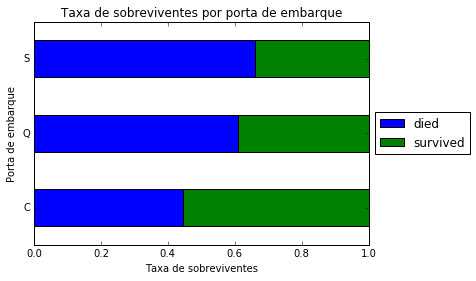

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt

survived_count_emb = survived_count.div(survived_count.sum(1).astype(float), axis = 0) #to get the percentages
survived_count_emb.plot(kind='barh', stacked=True)
plt.title('Taxa de sobreviventes por porta de embarque')
plt.ylabel('Porta de embarque')
plt.xlabel('Taxa de sobreviventes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Para o terceiro e o quarto gráfico irei carregar novamente a planilha para utilizar as colunas _PassengerId_ e _Pclass_.

In [13]:
# Primeiros registros da planilha
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Como visto, a coluna _Embarked_ possui 2 valores inexistentes e será preenchido com a moda novamente.

In [14]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

# Verificar se colunas Age e Embarked ainda possuem valores inexistentes
print(titanic_data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


Farei algumas formatações nas colunas de interesse.

In [15]:
# Substituir dados das colunas Pclas e Embarked
titanic_data.Pclass.replace([1, 2, 3], ['Primeira', 'Segunda', 'Terceira'], inplace=True)
titanic_data.Sex.replace(['male', 'female'], ['masculino', 'feminino'], inplace=True)
titanic_data.Embarked.replace(['S', 'C', 'Q'], ['Southampton, UK', 'Cherbourg, FR', 'Queenstown, IR'], inplace=True)

# Substituir nomes das colunas PassengerId, Pclass, Embarked e Sex
titanic_data.rename(columns={'PassengerId': 'Passageiros', 'Pclass': 'Classe', 'Embarked': 'Embarque', 'Sex': 'Sexo'}, inplace=True)
titanic_data.head()

,Passageiros,Survived,Classe,Name,Sexo,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarque
0,1,0,Terceira,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,"Southampton, UK"
1,2,1,Primeira,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,71.2833,C85,"Cherbourg, FR"
2,3,1,Terceira,"Heikkinen, Miss. Laina",feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,"Southampton, UK"
3,4,1,Primeira,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,113803,53.1000,C123,"Southampton, UK"
4,5,0,Terceira,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,"Southampton, UK"


Verificarei algumas porcentagens que farão parte da história contada nos gráficos.

In [16]:
# Quantidade de homens e mulheres por porta de embarque
gender_count = pd.crosstab(titanic_data['Embarque'], titanic_data['Sexo'])
gender_count

Sexo,feminino,masculino
Embarque,,
"Cherbourg, FR",73,95
"Queenstown, IR",36,41
"Southampton, UK",205,441


In [17]:
gender_count.sum(0)

Sexo
feminino     314
masculino    577
dtype: int64

In [18]:
# Porcentagem de homens com relação a mulheres em Southampton
def percent(num1, num2):
    percentage = '{0:.2f}'.format((num1 / num2 * 100))
    return percentage

print(percent(441,646))

68.27


In [19]:
# Porcentagem de embarque em Southampton com relação ao total

print(percent(646, 891))

72.50


Por fim, será gerado o arquivo csv para os gráficos finais.

In [20]:
titanic_data.to_csv('d3_2.csv', sep=',', index=False)

## Outras análises (com seaborn)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [104]:
titanic_data = pd.read_csv("titanic_data.csv")


In [105]:
df = titanic_data
df.Embarked.replace(['S', 'C', 'Q'], ['Southampton, UK', 'Cherbourg, FR', 'Queenstown, IR'], inplace=True)
df.Sex.replace(['male', 'female'], ['homem', 'mulher'], inplace=True)
titanic_data.Survived.replace([1, 0], ['sobreviveu', 'morreu'], inplace=True)

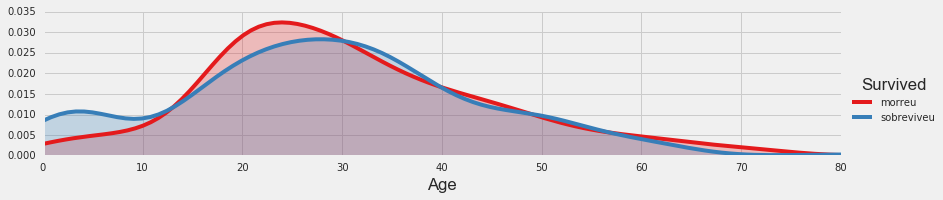

In [83]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4,palette="Set1");
facet.map(sns.kdeplot,'Age',shade= True);
facet.set(xlim=(0, df['Age'].max()));
facet.add_legend();

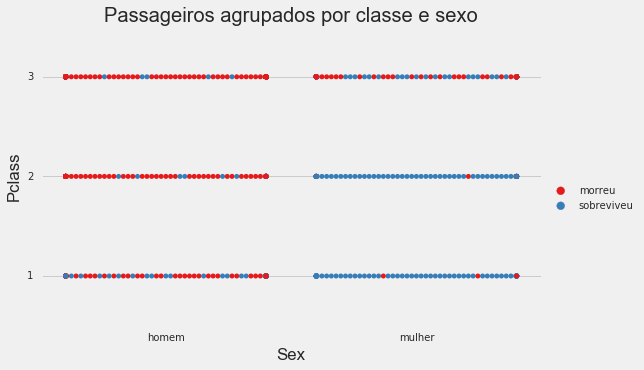

In [84]:
# Swarm plot mostrando o numero de passageiros que sobreviveram agrupados por classe e sexo.

print() 
plt.subplots(figsize=(8,5));
sns.swarmplot(x="Sex", y="Pclass", hue="Survived", data=df, palette="Set1");
plt.title('Passageiros agrupados por classe e sexo');
plt.yticks(np.arange(1,4,1));
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

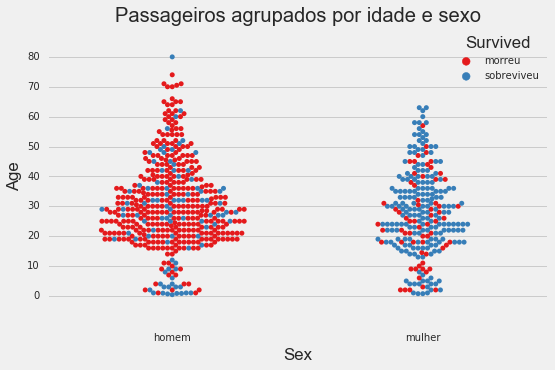

In [85]:
# Swarm plot mostrando o numero de passageiros que sobreviveram agrupados por idade e sexo.

print()
plt.subplots(figsize=(8,5));
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df, palette="Set1");
plt.title('Passageiros agrupados por idade e sexo');
plt.yticks(np.arange(0,90,10));

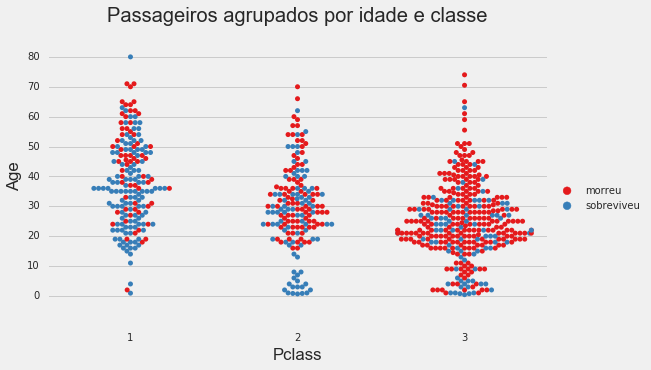

In [86]:
# Swarm plot mostrando o numero de passageiros que sobreviveram agrupados por idade e classe.

print()
plt.subplots(figsize=(8,5));
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=df,palette="Set1");
plt.title('Passageiros agrupados por idade e classe');
plt.yticks(np.arange(0,90,10));
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

*Observações:*
- *Maior proporção de passageiros da primeira classe sobreviveram que da segunda ou terceira classe*
- *Maior proporção de passageiros da segunda classe sobreviveram que passageiros da terceira classe*
- *Maior proporção de jovens adultos (~20 à ~40 anos) eram da terceira classe*
- *Uma alta proporção de passageiros da terceira classe não sobreviveram*

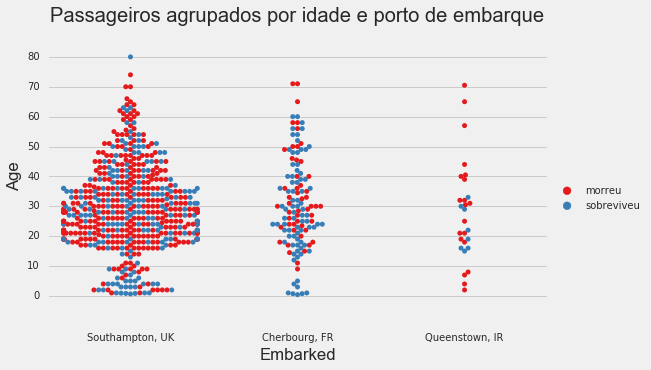

In [87]:
# Swarm plot mostrando o numero de passageiros que sobreviveram agrupados por idade e porto de embarque.

print # Just for an extra space
plt.subplots(figsize=(8,5));
sns.swarmplot(x="Embarked", y="Age", hue="Survived", data=df,palette="Set1");
plt.title('Passageiros agrupados por idade e porto de embarque');
plt.yticks(np.arange(0,90,10));
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

*Observations*:
- *A maioria das pessoas embarcaram em Southampton*
- *A maior taxa de sobrevivência foi a das pessoas que embarcaram em Cherbourg(FR)*
- *Será que o porto de embarque determinava em qual quarto no navio o passageiro ficaria?*
    - *Se sim, isso pode ter sido a razaão do impacto na sobrevicência (alcance mais rápido aos botes salva-vidas, etc.)*

Salvando o dataset tratado para a contrução do parallel set

In [128]:
titanic_data = pd.read_csv("titanic_data.csv")


df = titanic_data
df.Embarked.replace(['S', 'C', 'Q'], ['Southampton, UK', 'Cherbourg, FR', 'Queenstown, IR'], inplace=True)
df.Sex.replace(['male', 'female'], ['homem', 'mulher'], inplace=True)
titanic_data.Survived.replace([1, 0], ['sobreviveu', 'morreu'], inplace=True)

In [131]:
df.rename(columns={'Pclass': 'Classe', 'Embarked': 'Embarque', 'Sex': 'Sexo', 'Age': 'Idade', 'Survived': 'Sobreviveu'}, inplace=True)

In [132]:
def round_age(x):
    age_range = 'unknown'
    if x == '':
        age_range = 'unknown'
    if x<18:
        age_range = '<18'
    if 40>x>18:
        age_range = '18-40'
    if 70>x>40:
        age_range = '40-70'
    if x>70: 
        age_range = '>70'
    return age_range

df.Idade = df.Idade.apply(round_age)

In [133]:
df.to_csv('titanic.csv', sep=',', index=False)
df.Idade.head(10)

0      18-40
1      18-40
2      18-40
3      18-40
4      18-40
5    unknown
6      40-70
7        <18
8      18-40
9        <18
Name: Idade, dtype: object

# Referências Bibliográficas

http://felipegalvao.com.br/blog/2016/02/29/manipulacao-de-dados-com-python-pandas/

https://github.com/jocelyn-ong/data-science-projects/blob/master/ga-dsi-weekly-projects/project-5-titanic.ipynb
    
https://github.com/nglgzz/titanic/blob/master/titanic.ipynb

http://bl.ocks.org/Meschreiber/raw/5188e038c6360268a43d2f47dafc8835/

https://en.wikipedia.org/wiki/RMS_Titanic